# GRIP : The Sparks Foundation

## Data Science & Business Analytics Intern

## Author : Alpesh Patel

# Task 7 : Stock Market Prediction using Numerical and Textual Analysis

### Dataset 1 -  Historical stock prices
Link of dataset - https://finance.yahoo.com/
### Dataset 2 -  India News Headlines
Link of dataset - https://bit.ly/36fFPI6

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

## Reading data numerical 
Data can be found at https://finance.yahoo.com/ and https://bit.ly/36fFPI6

In [2]:
stock_df = pd.read_csv("^BSESN.csv")
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-17,41324.039063,41420.339844,41030.578125,41055.691406,41055.691406,6900.0
1,2020-02-18,41042.460938,41042.460938,40610.949219,40894.378906,40894.378906,12300.0
2,2020-02-19,41121.511719,41357.160156,41048.929688,41323.000000,41323.000000,5600.0
3,2020-02-20,41334.960938,41399.929688,41134.308594,41170.121094,41170.121094,8400.0
4,2020-02-24,41037.011719,41037.011719,40306.359375,40363.230469,40363.230469,8100.0


In [3]:
stock_df.shape

(250, 7)

In [4]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       246 non-null    float64
 2   High       246 non-null    float64
 3   Low        246 non-null    float64
 4   Close      246 non-null    float64
 5   Adj Close  246 non-null    float64
 6   Volume     246 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
# Unique value in each columns
for i in stock_df.columns:
    print(i, len(stock_df[i].unique()))

Date 250
Open 247
High 247
Low 247
Close 247
Adj Close 247
Volume 152


In [6]:
# list of Features in dataset
list_columns = stock_df.columns
list_columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## Find averge , min, max, etc... for Continuous Variable

In [7]:
stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,38907.046621,39196.896278,38489.134329,38851.461994,38851.461994,20398.780488
std,6060.000913,5976.135268,6142.477320,6087.893120,6087.893120,16247.927294
min,26499.810547,27462.869141,25638.900391,25981.240234,25981.240234,0.000000
25%,34244.863281,34558.888672,33951.600586,34217.800781,34217.800781,14625.000000
50%,38464.285157,38734.275390,38185.416015,38408.246094,38408.246094,18300.000000
75%,43297.164062,43538.533203,43032.581055,43421.547851,43421.547851,22200.000000
max,52400.031250,52516.761719,51863.609375,52104.171875,52104.171875,188300.000000


Text(0.5, 1.0, 'Visualize average, numberOf, min, max, std, Queartile')

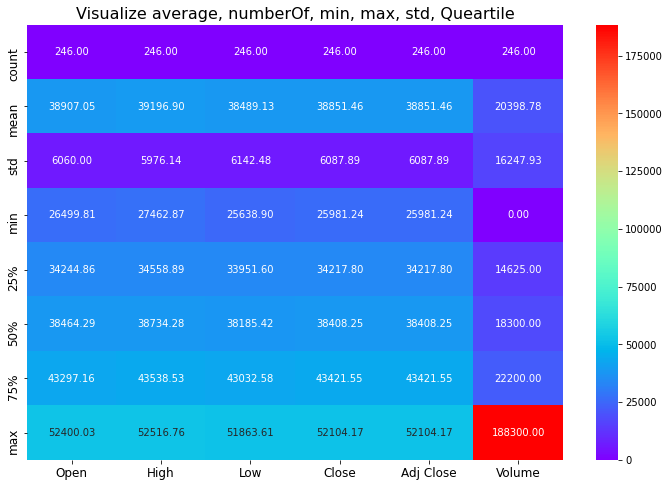

In [8]:
# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(stock_df.describe(), annot = True, fmt = '.2f', cmap = 'rainbow')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Visualize average, numberOf, min, max, std, Queartile", fontsize = 16)

## Cheack Missing value

In [9]:
# cheack missing value
stock_df.isna().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

missing value avalible

In [10]:
# Treat missing value
stock_df.dropna(inplace=True)

In [11]:
# cheack missing value
stock_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
# Date transform
stock_df['Date'] = pd.to_datetime(stock_df['Date'] ,format='%Y-%m-%d')
stock_df.index = stock_df['Date']

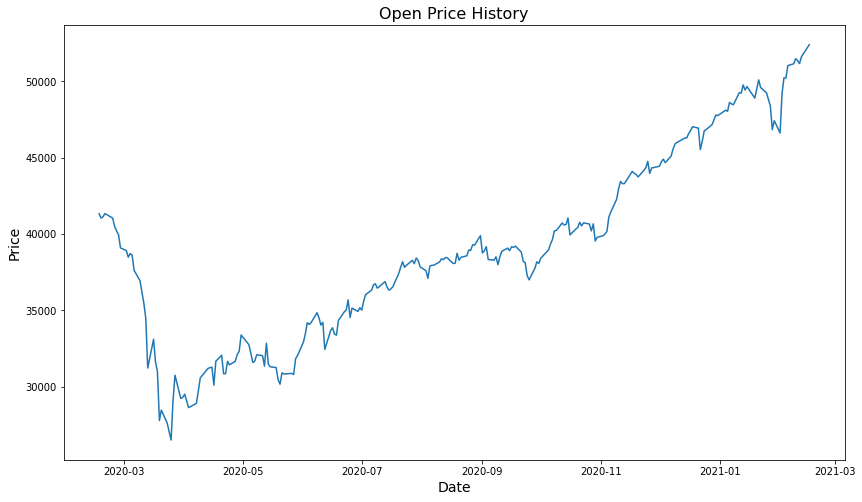

In [13]:
# Open Price History plot
plt.figure(figsize=(14, 8))
plt.plot(stock_df['Date'], stock_df['Open'])
plt.title("Open Price History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

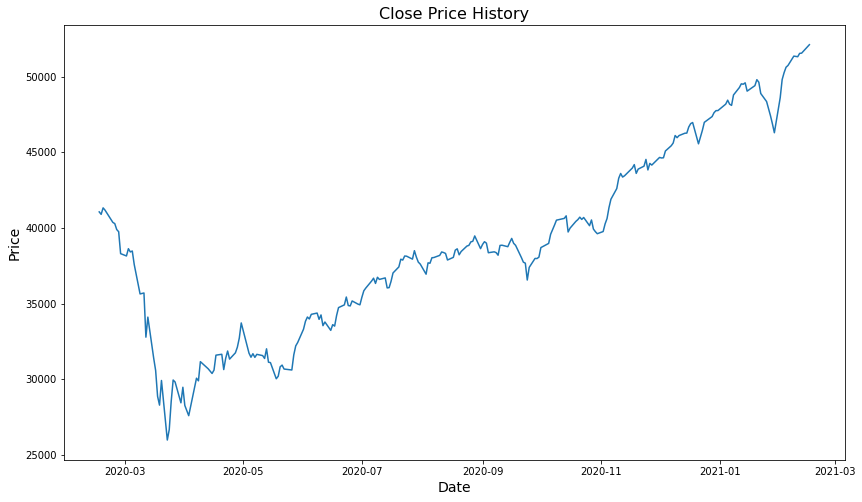

In [14]:
# Close Price History plot
plt.figure(figsize=(14, 8))
plt.plot(stock_df['Date'], stock_df['Close'])
plt.title("Close Price History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

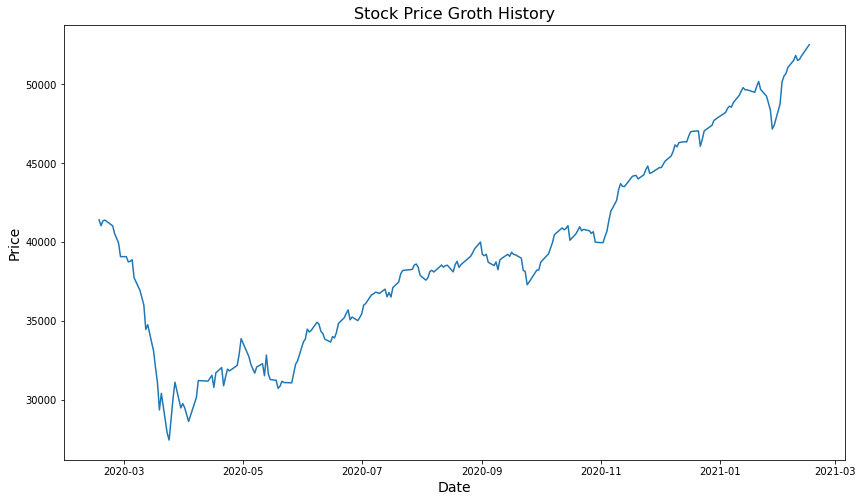

In [15]:
# Stock Price Groth History plot
plt.figure(figsize=(14, 8))
plt.plot(stock_df['Date'], stock_df['High'])
plt.title("Stock Price Groth History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

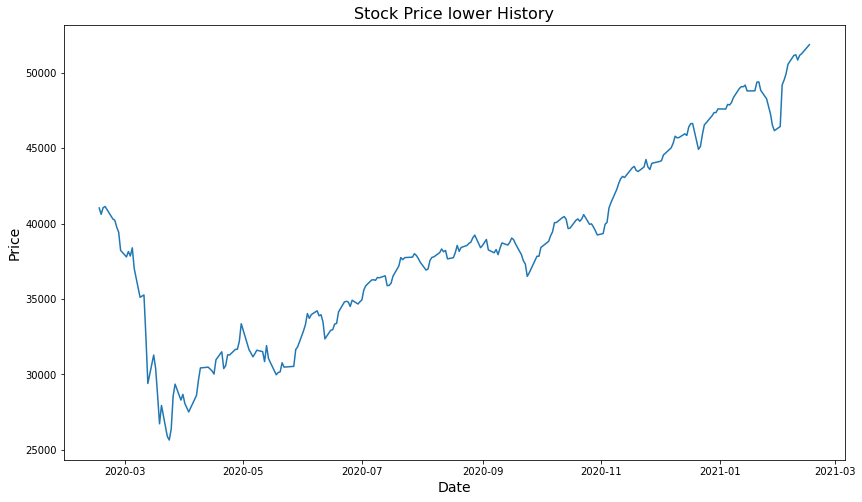

In [16]:
# Stock Price lower History plot
plt.figure(figsize=(14, 8))
plt.plot(stock_df['Date'], stock_df['Low'])
plt.title("Stock Price lower History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

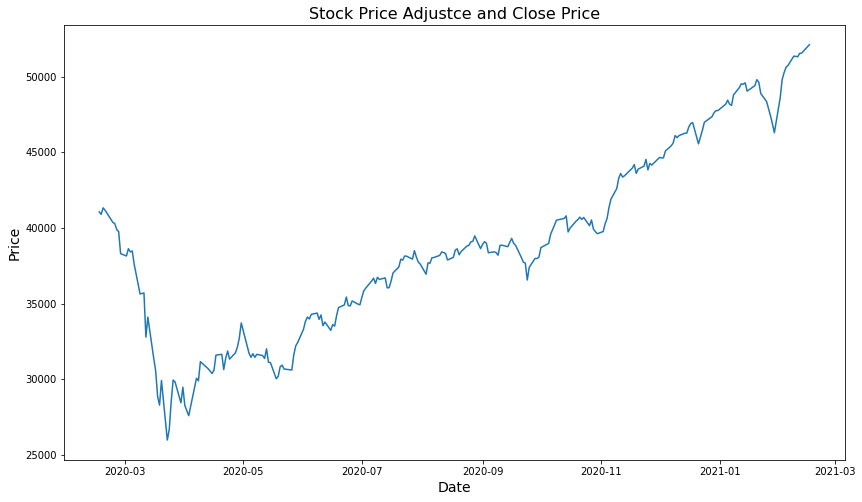

In [17]:
# Stock Price Adjustce and Close Price plot
plt.figure(figsize=(14, 8))
plt.plot(stock_df['Date'], stock_df['Adj Close'])
plt.title("Stock Price Adjustce and Close Price", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

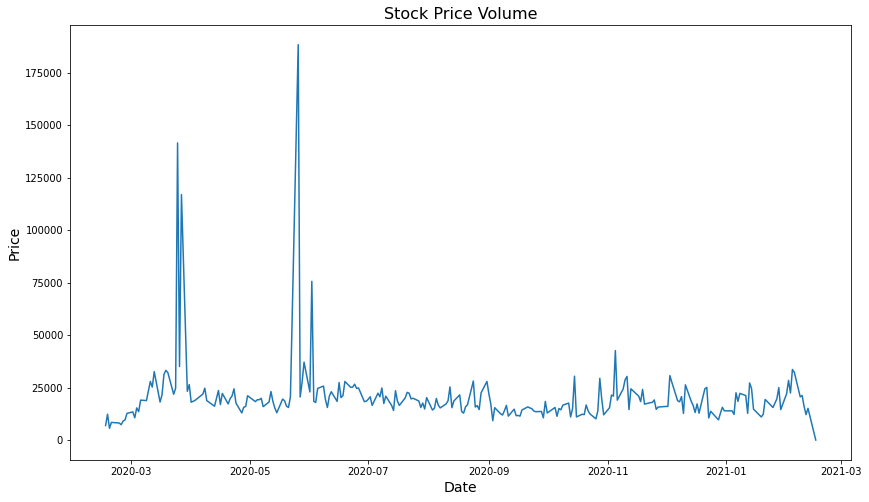

In [18]:
# Stock Price Volume plot
plt.figure(figsize=(14, 8))
plt.plot(stock_df['Date'], stock_df['Volume'])
plt.title("Stock Price Volume", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

## Stock market volume price Prediction

## Misiing value care

In [19]:
# cheack missing value
stock_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [20]:
stock_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

## Split dependent and independent data

In [21]:
X = stock_df.iloc[:, 1:7].values
y = stock_df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Standerd Scale transform

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

>## The Random Forest Regression

## Training the Random Forest Regression model on the Training set

In [24]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

print("The Random Forest Regression model trained")

The Random Forest Regression model trained


## Predicting test sat using Random Forest Regression trained model 

In [25]:
y_pred = regressor.predict(X_test)
y_pred

array([19510., 15370., 15320., 17580., 24540., 16570., 22270., 11950.,
       18390., 18680., 25120., 27840., 13610., 15410., 18230., 15720.,
       22500., 16690., 21010., 94500., 14620., 17930., 11450., 21420.,
       12890., 17930., 19920., 19570., 12790., 12440., 16500., 15530.,
       12230.,  7300., 32110., 12850., 13530., 10720., 11610., 19020.,
       10690., 10670., 18350., 15360., 14480., 21010., 14530., 16500.,
       20560., 18080., 14770., 27720., 11770.,  9190., 16520., 20960.,
       19190., 15060., 30440., 18610., 15270., 16670., 24680., 18680.,
       22870., 26280., 22230., 27840., 17180., 27430., 25180., 22270.,
       32870., 20600.,  8470., 20180., 15320., 12230., 15820., 32680.,
       32800., 25060.])

## Visualize the Train Result

In [26]:
# create dataframe
df = pd.DataFrame()
df

""


In [27]:
Pred_x_train = regressor.predict(X_train)

df['predict_train'] = Pred_x_train
df['predict_train']

0      13620.0
1      22500.0
2      19680.0
3      19010.0
4       8390.0
        ...   
159    22870.0
160    19100.0
161    17170.0
162    21090.0
163    13900.0
Name: predict_train, Length: 164, dtype: float64

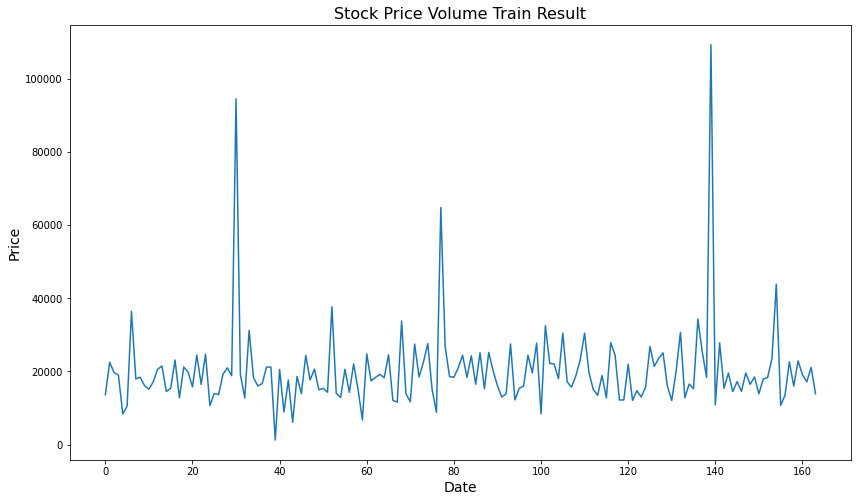

In [28]:
plt.figure(figsize=(14, 8))
plt.plot(df['predict_train'])
plt.title("Stock Price Volume Train Result", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

## Visualize the Test Result

In [29]:
df1 = pd.DataFrame()
df1

""


In [30]:
df1['predict'] = y_pred
df1['predict']

0     19510.0
1     15370.0
2     15320.0
3     17580.0
4     24540.0
       ...   
77    12230.0
78    15820.0
79    32680.0
80    32800.0
81    25060.0
Name: predict, Length: 82, dtype: float64

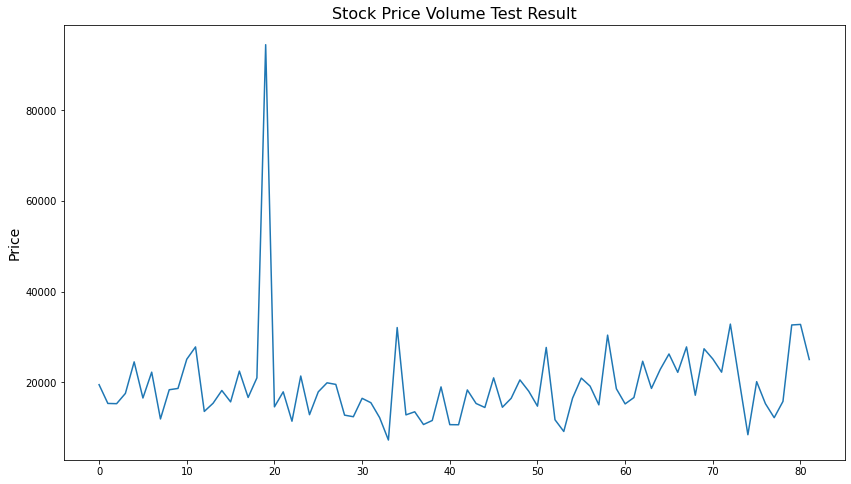

In [31]:
plt.figure(figsize=(14, 8))
plt.plot(df1['predict'])
plt.title("Stock Price Volume Test Result", fontsize = 16)
plt.ylabel("Price", fontsize = 14)
plt.show()

## Accuracy of model

In [32]:
print("Accuracy score : ", np.mean(y_pred==y_test))

Accuracy score :  0.04878048780487805


**Using model we can predict  **

># Textual Analysis

## Importing the dataset

In [33]:
news_df = pd.read_csv('india-news-headlines.csv')
news_df.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [34]:
news_df.shape

(3297172, 3)

In [35]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [36]:
news_df.dtypes

publish_date          int64
headline_category    object
headline_text        object
dtype: object

In [37]:
news_df['headline_text']

0          win over cena satisfying but defeating underta...
1          Status quo will not be disturbed at Ayodhya; s...
2                        Fissures in Hurriyat over Pak visit
3                      America's unwanted heading for India?
4                         For bigwigs; it is destination Goa
                                 ...                        
3297167        why tiktok removed 1 65 crore videos in india
3297168    apurva asrani calls alia bhatts mother soni ra...
3297169    kangana ranaut gets a doll version of herself ...
3297170    meezaan jaffrey reminisces his childhood days ...
3297171    prabhas20 titled as radhe shyam prabhas and po...
Name: headline_text, Length: 3297172, dtype: object

## Missing value

In [38]:
news_df.drop('headline_category', axis=1, inplace=True)
news_df['publish_date'] = pd.to_datetime(news_df['publish_date'], format='%Y%m%d')
news_df.head()

,publish_date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


In [39]:
news_df.rename(columns={'publish_date': 'Date'}, inplace = True)

## Duplicates remove data

In [40]:
news_df = news_df.drop_duplicates()
news_df.reset_index(inplace=True, drop=True)
news_df.head()

,Date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


In [41]:
news_df = news_df[:6000]

We are using 6000 rows of data because of my device computation speed. So 6000 rows are quickly computation.

In [42]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [43]:
news_df['Subjectivity'] = news_df['headline_text'].apply(getSubjectivity)
news_df['Polarity'] = news_df['headline_text'].apply(getPolarity)
news_df.head()

,Date,headline_text,Subjectivity,Polarity
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.000000
2,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000000
3,2001-01-02,America's unwanted heading for India?,0.000000,0.000000
4,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.000000


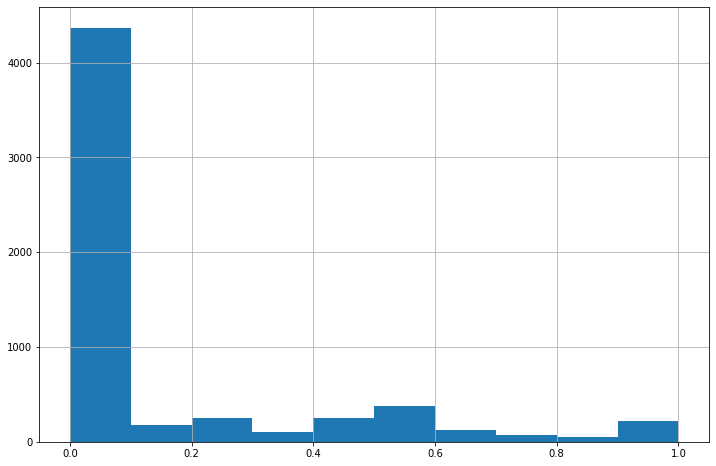

In [44]:
plt.figure(figsize = (12, 8))
news_df['Subjectivity'].hist()
plt.show()

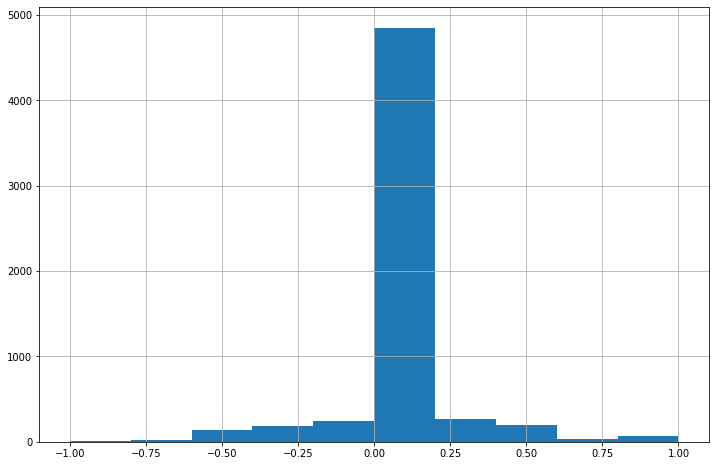

In [45]:
plt.figure(figsize = (12, 8))
news_df['Polarity'].hist()
plt.show()

## SentimentIntensity Analyzer

In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

senti_ana = SentimentIntensityAnalyzer()

In [47]:
news_df['compound'] = [senti_ana.polarity_scores(i)['compound'] for i in news_df['headline_text']]
news_df['Negative'] = [senti_ana.polarity_scores(i)['neg'] for i in news_df['headline_text']]
news_df['Neutral'] = [senti_ana.polarity_scores(i)['neu'] for i in news_df['headline_text']]
news_df['Positive'] = [senti_ana.polarity_scores(i)['pos'] for i in news_df['headline_text']]

news_df.head()

,Date,headline_text,Subjectivity,Polarity,compound,Negative,Neutral,Positive
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000,0.230,0.473,0.297
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.000000,0.2924,0.000,0.805,0.195
2,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.0000,0.000,1.000,0.000
3,2001-01-02,America's unwanted heading for India?,0.000000,0.000000,-0.2263,0.322,0.678,0.000
4,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.000000,0.0000,0.000,1.000,0.000


## Conclusion

We can using regressor model we can predict stock Volume price. The Accuracy of our prediction uing this model is **48 %** Accurate.

As per my analyes News headline data contain first month of 2001 Date but the stock data Date have secound month of 2020 so news headline not much useful for stock prediction.
